# Task 1: Data Preparation


In [49]:
import pandas as pd

# Load the CSV file into a DataFrame.
df = pd.read_csv('A1data.csv') # Since there're no need for decimal or header(like tutor teach in the class), no need to add those arguments

# Display the first few rows of the DataFrame to check it import correctly.
print(df.head())


  ISO3 Countries and areas Region Sub-region              Income Group Total  \
0  DZA             Algeria   MENA       MENA  Upper middle income (UM)   25%   
1  AGO              Angola    SSA        ESA  Lower middle income (LM)   19%   
2  ARG           Argentina    LAC        LAC  Upper middle income (UM)   43%   
3  ARM             Armenia    ECA       EECA  Upper middle income (UM)   81%   
4  BGD          Bangladesh     SA         SA  Lower middle income (LM)   34%   

  Residence (Rural) Residence (Urban) Wealth quintile (Poorest)  \
0               10%               33%                        1%   
1                2%               27%                        0%   
2               NaN               NaN                       NaN   
3               71%               89%                       44%   
4               31%               48%                        8%   

  Wealth quintile (Richest) Time period  
0                       78%   2018-2019  
1                       62%   20

### Check data in "Income Group" column

In [50]:
# Save correct data format in a variable
expected_income_groups = [
    'Low income (L)', 
    'Lower middle income (LM)', 
    'Upper middle income (UM)', 
    'High income (H)'
]

# Get all unique values in the 'Income Group' column and save them into a variable 
unique_income_groups = df['Income Group'].unique()
unexpected_values = [] # later will store wrong value in this list

# Iterate over unique_income_gros and compare each of the elements with the expected data format
for value in unique_income_groups:
    # If the value is not in the list of expected income groups, add it to unexpected_values
    if value not in expected_income_groups:
        unexpected_values.append(value)

# Print out the result and double check the unexpected values
print(unexpected_values)

#check whether there have missing values
missing_values = df['Income Group'].isnull().sum()
print("The amount of Missing values\n", missing_values)


['Lower middle income (LLM)', 'Lower middle income (LMM)']
The amount of Missing values
 0


In [51]:
# Define a dictionary mapping incorrect values to the correct ones
corrections = {
    'Lower middle income (LLM)': 'Lower middle income (LM)', # it means the 'Lower middle income (LLM)' should be changed to 'Lower middle income (LM)'
    'Lower middle income (LMM)': 'Lower middle income (LM)'
}

# Replace the incorrect values in the 'Income Group' column
df['Income Group'] = df['Income Group'].replace(corrections)

# Double check the changes by checking the unique values again
print(df['Income Group'].unique())

['Upper middle income (UM)' 'Lower middle income (LM)' 'High income (H)'
 'Low income (L)']


In [52]:
# Strip leading and trailing whitespace from the 'Income Group' column 
df['Income Group'] = df['Income Group'].str.strip()


### Check columns that in percentage type

In [53]:
# List of columns to check for NaN or empty values
percentage_columns = [
    'Total', 
    'Residence (Rural)', 
    'Residence (Urban)', 
    'Wealth quintile (Poorest)', 
    'Wealth quintile (Richest)'
]

# Function to clean extra spaces in the fields
def clean_extra_spaces(value):
    """
    Identify and remove any leading, trailing, or internal spaces like '3 %', '57% ', or ' 60%'. 
    """
    if isinstance(value, str):
        # Strip leading and trailing spaces, and remove internal spaces
        value = value.strip().replace(' ', '')
    return value

# Apply the cleaning function to the specified percentage columns
df[percentage_columns] = df[percentage_columns].applymap(clean_extra_spaces)

# Function to remove the '%' sign and convert percentage strings to float for further processing 
def convert_to_numeric(value):
    if isinstance(value, str):
        # Remove the '%' sign and convert to float
        return float(value.replace('%', ''))
    return value

# Apply the conversion function
df[percentage_columns] = df[percentage_columns].applymap(convert_to_numeric)
df[percentage_columns] = df[percentage_columns]/100 # covert the % to decimal, like 10% -> 0.1

# Verify that the columns are now numeric
print(df[percentage_columns].dtypes)

# Check for out-of-range values in the percentage columns
out_of_range = df[percentage_columns].apply(lambda x: (x < 0) | (x > 1))

# Display rows with out-of-range values
out_of_range_rows = df[out_of_range.any(axis=1)]
print("\nRows with out-of-range values:\n", out_of_range_rows)

# Cap the percentage values to the range 0% to 100%
# Any value below 0 will be set to 0, and any value above 100 will be set to 100
df[percentage_columns] = df[percentage_columns].clip(0, 1)

# Check again
out_of_range = df[percentage_columns].apply(lambda x: (x < 0) | (x > 1))
out_of_range_rows = df[out_of_range.any(axis=1)]
print("\nRows with out-of-range values:\n", out_of_range_rows)

Total                        float64
Residence (Rural)            float64
Residence (Urban)            float64
Wealth quintile (Poorest)    float64
Wealth quintile (Richest)    float64
dtype: object

Rows with out-of-range values:
    ISO3 Countries and areas Region Sub-region              Income Group  \
59  RUS  Russian Federation    ECA       EECA  Upper middle income (UM)   

    Total  Residence (Rural)  Residence (Urban)  Wealth quintile (Poorest)  \
59   0.86               0.79               0.94                       0.88   

    Wealth quintile (Richest) Time period  
59                        1.1        2018  

Rows with out-of-range values:
 Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Residence (Rural), Residence (Urban), Wealth quintile (Poorest), Wealth quintile (Richest), Time period]
Index: []


/var/folders/y4/x54xpg2j5h1b3cx_7243b5qc0000gn/T/ipykernel_51720/214131680.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[percentage_columns] = df[percentage_columns].applymap(clean_extra_spaces)
/var/folders/y4/x54xpg2j5h1b3cx_7243b5qc0000gn/T/ipykernel_51720/214131680.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[percentage_columns] = df[percentage_columns].applymap(convert_to_numeric)


In [54]:
# Check and calculate for NaN values in the specified columns
missing_values = df[percentage_columns].isnull().sum()
print("Missing values in each percentage column:\n", missing_values)

# Replace all NaN values in the DataFrame with -1
df = df.fillna(-1)

# Verify that there are no more NaN values
print(df.isnull().sum())


Missing values in each percentage column:
 Total                        0
Residence (Rural)            5
Residence (Urban)            4
Wealth quintile (Poorest)    7
Wealth quintile (Richest)    7
dtype: int64
ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            0
Residence (Urban)            0
Wealth quintile (Poorest)    0
Wealth quintile (Richest)    0
Time period                  0
dtype: int64


### Check 'Time Period' columns

In [55]:
# Apply the cleaning function to the 'Time period' column
df['Time period']=df['Time period'].apply(clean_extra_spaces)

import re
from datetime import datetime

# Get the current year
current_year = datetime.now().year

def check_time(value):
    """
    Check the year is not in the future or far past or the end year is smaller than start year
    """
    if isinstance(value, str):
        if re.match(r'^\d{4}$', value): #Check the value is Single year and correct format
            year = int(value)
            if 2000 <= year <= current_year:
                return value
            else:
                return -1
        elif re.match(r'^\d{4}-\d{4}$', value): # Year range
            start_year, end_year = map(int, value.split('-'))
            if 2000 <= start_year < end_year <= current_year:
                return value
            else:
                return -1
        else:
            return -1
    else:
        return value

# Apply the validation function to the 'Time period' column
df['Time period'] = df['Time period'].apply(check_time)
      

In [56]:
# Custom function to convert the Time value to a Period object for further processing
def to_period(value):
    if isinstance(value, str) and value != '-1':
        if '-' in value:
            start_year, end_year = value.split('-')
            return pd.Period(start_year, freq='Y'), pd.Period(end_year, freq='Y')  # Annual frequency for year range
        else:
            return pd.Period(value, freq='Y'), pd.Period(value, freq='Y')  # Annual frequency for a single year, Single year's end year remains the same
    else:
        return pd.NaT, pd.NaT  # Return NaT (Not a Time) for invalid entries

# Apply the conversion function and create two columns
df[['Start year', 'End year']] = df['Time period'].apply(lambda x: pd.Series(to_period(x)))

df = df.drop(columns=['Time period'])

print(df[['Start year', 'End year']])

   Start year End year
0        2018     2019
1        2015     2016
2        2011     2012
3        2015     2016
4        2019     2019
..        ...      ...
85        NaT      NaT
86       2017     2017
87       2012     2012
88       2018     2019
89       2018     2019

[90 rows x 2 columns]


### Check Duplicate rows

In [57]:
# check duplicate rows
duplicates = df.duplicated()
for index, i in enumerate(duplicates):
    if i is True:
        print(index, i)

30 True
75 True
76 True


In [58]:
# clean the duplicate rows and keep the first one
df= df.drop_duplicates()

In [59]:
# save cleaned data into csv

df.to_csv('s4068959-cleaned-A1data.csv',index=False, na_rep='NaT') # turn Nat into 'NaT' to display in csv file, otherwise the fields will be blank


# Task 2: Data Exploration

## Task 2.1 

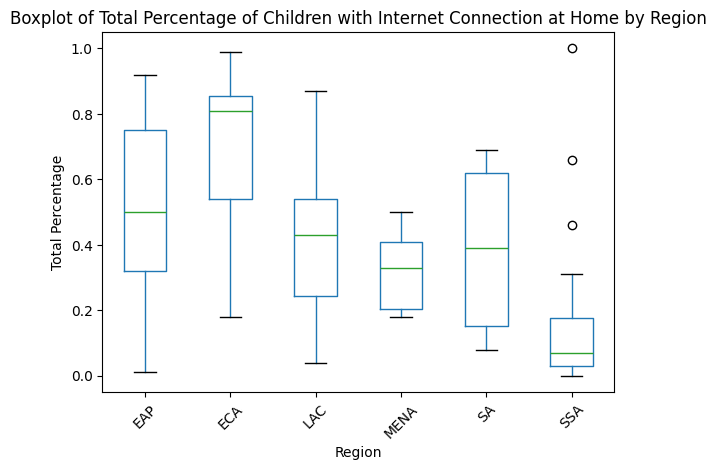

,Region,Median_Total_Percentage
0,EAP,0.50
1,ECA,0.81
2,LAC,0.43
3,MENA,0.33
4,SA,0.39
5,SSA,0.07


In [60]:
# Code goes after this line by adding cells
import matplotlib.pyplot as plt

# Create a boxplot grouped by Region
df.boxplot(column='Total',by='Region',grid=False) # create boxplot for the 'Total' column, grouping the data by 'Region'.
plt.title('Boxplot of Total Percentage of Children with Internet Connection at Home by Region')
plt.suptitle('') # Removes the default unecessary supertitle
plt.xlabel('Region')
plt.ylabel('Total Percentage')
plt.xticks(rotation=45) # Rotates the x-axis labels to enhance readability
plt.show()

# Compute the median of the total percentage grouped by Region
median_by_region = df.groupby('Region')['Total'].median().reset_index() #group by region, then select total columns, then calculate the median, then list re-give them index number
median_by_region.columns = ['Region','Median_Total_Percentage']
median_by_region

## Task 2.2 

In [61]:
# Code goes after this line by adding cells
# Compute the mean percentage for Wealth quintile (Poorest) and Wealth quintile (Richest)

mean_poorest = df['Wealth quintile (Poorest)'].mean()
mean_richest = df['Wealth quintile (Richest)'].mean()

print(f"Mean for Wealth quintile (Poorest): {mean_poorest}")
print(f"Mean for Wealth quintile (Richest): {mean_richest}")

Mean for Wealth quintile (Poorest): 0.09045977011494254
Mean for Wealth quintile (Richest): 0.48827586206896556


In [62]:
# Sort the data by Wealth quintile (Poorest) in descending order and get the top 10
top_10_poorest = df.sort_values(by='Wealth quintile (Poorest)', ascending=False).head(10)

# list the top 10 and their corresponding country names
print(top_10_poorest[['Countries and areas', 'Wealth quintile (Poorest)']])

# repeat same thing for 'richest'
top_10_richest = df.sort_values(by='Wealth quintile (Richest)', ascending=False).head(10)
print(top_10_richest[['Countries and areas', 'Wealth quintile (Richest)']])

   Countries and areas  Wealth quintile (Poorest)
65             Somalia                       1.00
59  Russian Federation                       0.88
9               Brazil                       0.84
77               Tonga                       0.83
15               Chile                       0.75
68           Sri Lanka                       0.71
73     North Macedonia                       0.68
63              Serbia                       0.65
36               Japan                       0.64
40          Kyrgyzstan                       0.56
   Countries and areas  Wealth quintile (Richest)
10            Bulgaria                       1.00
59  Russian Federation                       1.00
63              Serbia                       1.00
65             Somalia                       1.00
5             Barbados                       1.00
73     North Macedonia                       1.00
18          Costa Rica                       0.99
68           Sri Lanka                       0.99


## Task 2.3 

In [63]:
lm_data = df[df['Income Group'] == 'Lower middle income (LM)']

rural_mean = lm_data['Residence (Rural)'].mean()
rural_median = lm_data['Residence (Rural)'].median()
rural_std_dev = lm_data['Residence (Rural)'].std()

urban_mean = lm_data['Residence (Urban)'].mean()
urban_median = lm_data['Residence (Urban)'].median()
urban_std_dev = lm_data['Residence (Urban)'].std()

comparison = pd.DataFrame({'Measure':['Mean', 'Median', 'Standard Deviation'],
                           'Rural':[rural_mean,rural_median,rural_std_dev],
                           'Urban':[urban_mean,urban_median,urban_std_dev]})    

print(comparison)

              Measure     Rural     Urban
0                Mean  0.081333  0.300000
1              Median  0.045000  0.255000
2  Standard Deviation  0.253197  0.223128


### Create a visual aid

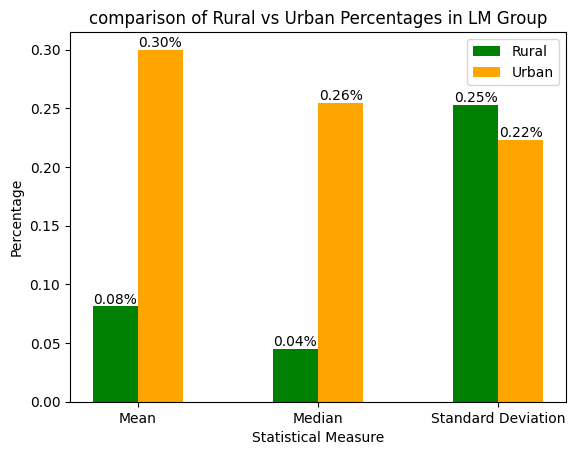

In [64]:
import numpy as np
labels = comparison['Measure']
rural_values = comparison['Rural']
urban_values = comparison['Urban']

#create bar chart
x = np.arange(len(labels)) # label location
width = 0.25 # width of the bar

# plot the bars
plt.bar(x - width/2, rural_values, width, color = 'green', label='Rural') # x-width/2 -> Adjusts the position of the rural bars to the left
plt.bar(x + width/2, urban_values, width, color = 'orange',label='Urban')

# add the exact percentage values above the bars
for i in range(len(rural_values)):
    plt.text(x[i] - width/2, rural_values[i], f'{rural_values[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width/2, urban_values[i], f'{urban_values[i]:.2f}%', ha='center', va='bottom', fontsize=10)


plt.xlabel('Statistical Measure')
plt.ylabel('Percentage')
plt.title('comparison of Rural vs Urban Percentages in LM Group')
plt.xticks(x, labels)
plt.legend()

plt.show()